<a href="https://colab.research.google.com/github/typjohnson/MLA_TPJ/blob/main/MLA4_TPJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model and Pipeline Imports

In [2]:
#import decision tree, minmax scaler, onehot encode
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data

In [5]:
df = pd.read_csv('/content/drive/MyDrive/CS430/MLA3/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Splitting the Data

In [6]:
X = df.drop('forgery', axis=1)
y = df['forgery']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline Building

In [7]:
#pipeline for numeric columns (all are numeric in this for the X)
numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

In [8]:
dt_pipeline = Pipeline([
    ('numerical', numerical_pipeline),
    ('classifier', DecisionTreeClassifier())
])

In [9]:
#running the pipeline
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('numerical', Pipeline(steps=[('scaler', MinMaxScaler())])),
                ('classifier', DecisionTreeClassifier())])

In [10]:
y_pred = dt_pipeline.predict(X_test)

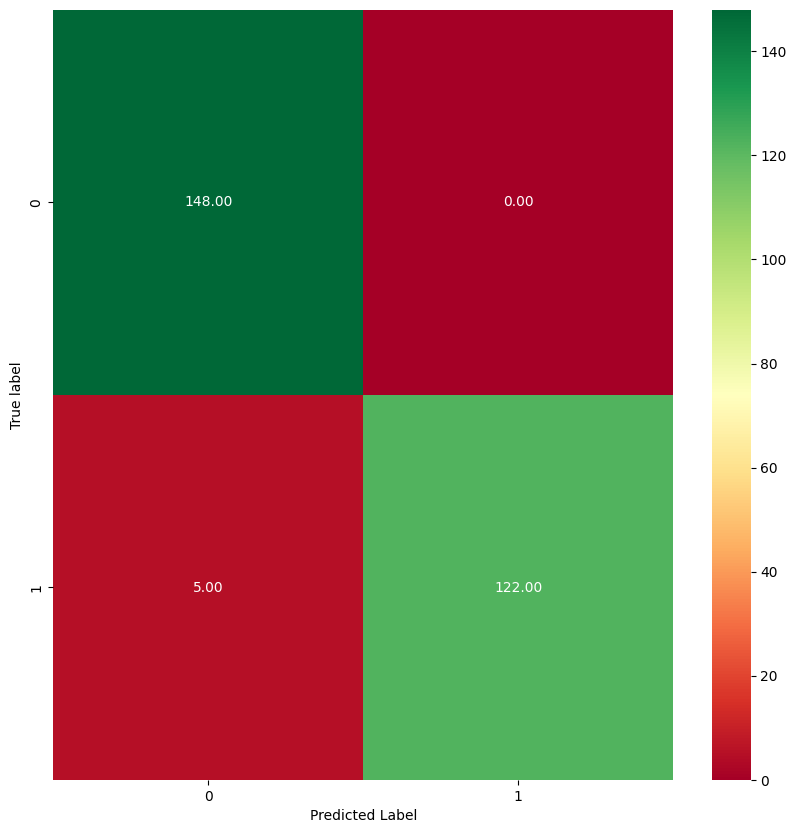

In [11]:
# confusion matrix
plot_cm(y_test, y_pred)

In [12]:
# assessing precision, recall, and f1 score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       148
           1       1.00      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



# Conclusion
Based on the results, the model appears to be very suitable for predicting banknote forgery. The overall accuracy is at 98%, and the precision, recall, and f1 score is at 96% or above for both classes (not forgery and forgery). The f1-score being 98% displays the model is very good at predicting positives IDs for both classes. Given the context of the model as well, accurately being able to identify banknote forgery a majority of the time is good. There is not much room for improvement, likely more data becoming available would only make the model more accurate.

# Decision Tree Regression

In [13]:
df = pd.read_csv('/content/drive/MyDrive/CS430/MLA3/Steel_industry_data.csv')
df.rename(columns = {'Usage_kWh':'usage_kwh',
                     'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh',
                     'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh',
                     'Lagging_Current_Power_Factor':'lag_current_pwr', 'Leading_Current_Power_Factor':'lead_current_pwr',
                     'NSM':'nsm', 'WeekStatus':'week_status', 'Day_of_week':'day_of_week', 'Load_Type':'load_type'}, inplace = True)
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


# Splitting the data

In [14]:
X = df.drop(columns=['date', 'usage_kwh'], axis=1)
y = df['usage_kwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numerical and categorical features, and setting up appropriate pipelines

In [15]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [16]:
numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# preprocessor pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

In [17]:
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor())
])

In [18]:
#running the pipeline
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('classifier', DecisionTreeRegressor())])

In [19]:
y_pred = dt_pipeline.predict(X_test)

In [20]:
#calculating rmse for train and test
train_rmse = np.sqrt(np.mean((y_train - dt_pipeline.predict(X_train))**2))
test_rmse = np.sqrt(np.mean((y_test - dt_pipeline.predict(X_test))**2))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 1.8409055288278078e-16
Test RMSE: 1.458815354129138


In [22]:
# accuracy
print('Accuracy:', dt_pipeline.score(X_test, y_test))

Accuracy: 0.9981278257964391


# Conclusion
The RMSE for the model that predicts kwh usage is extremely small for both the test and training data. The accuracy is also very good, being 99.81% accurate, which shows that the model performs extremely well for both the RMSE and accuracy score. There should not be any concern for overfitting or underfitting based on the results, it would appear that the model is overall performant.